# 收集数据和预处理

In [1]:
import pandas as pd # 导入Pandas数据处理工具包

## 收集数据

In [2]:
df_ads = pd.read_csv('易速鲜花微信软文.csv') # 读入数据
df_ads.head() # 显示前几行数据

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401


## 数据可视化

In [3]:
# 导入数据可视化所需要的库
import matplotlib.pyplot as plt # Matplotlib – Python 画图工具库
plt.rcParams['font.sans-serif']='Songti SC' # 设置字体，必须是本地有的
import seaborn as sns # Seaborn – 统计学数据可视化工具库

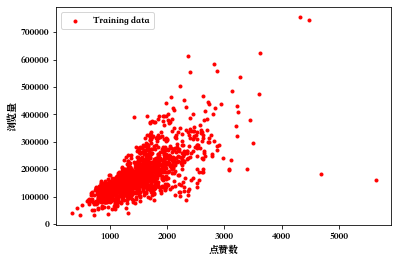

In [4]:
# 散点图
plt.plot(df_ads['点赞数'],df_ads['浏览量'],'r.', label='Training data') # 用 matplotlib.pyplot 的 plot 方法显示散点图
plt.xlabel('点赞数') # x轴Label
plt.ylabel('浏览量') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果！

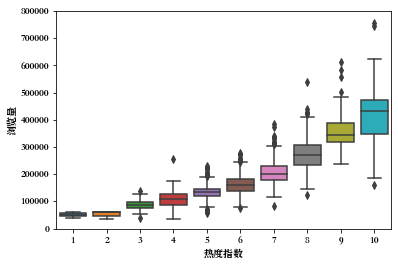

In [5]:
# 箱线图
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1) # 浏览量和热度指数
fig = sns.boxplot(x='热度指数', y="浏览量", data=data) # 用 seaborn 的箱线图画图
fig.axis(ymin=0, ymax=800000); # 设定 y 轴坐标

In [8]:
df_ads.isna().sum() # NaN出现的次数

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

## 数据清洗

In [6]:
df_ads.isna().sum() # NaN出现的次数
df_ads = df_ads.dropna() # 把出现了NaN的数据行删掉

## 构建特征集和标签集

In [7]:
X = df_ads.drop(['浏览量'],axis=1) # 特征集，Drop掉标签相关字段
X.head() # 显示前几行数据

,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [8]:
y = df_ads.浏览量 # 标签集
y.head() #显示前几行数据

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

## 拆分训练集、验证集和测试集

In [9]:
#将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split #导入train_test_split工具
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=0)

# 选择算法并建立模型

In [10]:
from sklearn.linear_model import LinearRegression # 导入线性回归算法模型
linereg_model = LinearRegression(fit_intercept=True, normalize = False) # 使用线性回归算法创建模型

# 训练模型

In [11]:
linereg_model.fit(X_train, y_train) # 用训练集数据，训练机器，拟合函数，确定内部参数

/Users/pangjiawei/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

# 评估和优化

## 预测

In [12]:
y_pred = linereg_model.predict(X_test) # 预测测试集的Y值

In [13]:
df_ads_pred = X_test.copy() # 测试集特征数据
df_ads_pred['浏览量真值'] = y_test # 测试集标签真值
df_ads_pred['浏览量预测值'] = y_pred # 测试集标签预测值
df_ads_pred #显示数据

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值
1074,1709,970.0,6,5,130003,181499.180492
404,1440,1440.0,4,4,118005,122478.101604
1375,1434,1454.0,7,5,189003,214815.847941
1317,832,832.0,6,6,105504,137486.350468
145,923,876.0,5,5,119501,110710.382414
...,...,...,...,...,...,...
420,1790,873.0,7,5,193004,211755.243385
1338,2622,1463.0,8,5,325002,301982.291922
542,1342,1372.0,6,5,161502,177814.080182
311,1663,1364.0,4,6,256002,136460.539585


## 评估

In [14]:
print('当前模型的4个特征的权重分别是: ', linereg_model.coef_)
print('当前模型的截距（偏置）是: ', linereg_model.intercept_)

当前模型的4个特征的权重分别是:  [   48.08395224    34.73062229 29730.13312489  2949.62196343]
当前模型的截距（偏置）是:  -127493.90606857155


In [15]:
print("线性回归预测评分：", linereg_model.score(X_test, y_test)) # 评估模型

线性回归预测评分： 0.740552064611524
